# Case_study_5_2

The objective now is to check the performance of BFGS compared with standard Gradient and Newton solutions for the Logistic-L2 problem.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
from local.lib.Generation import scenarios_classification
from local.lib.utils import solver_cvx, grad_FOM, grad_SOM, BFGS, calculation_Hessian_logistic, eval_loss, plot_surface
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#!pip install cvxpy

In [ ]:
import cvxpy as cp

In [3]:
# Loading scenarios
# ===========================
scenario=2
data_class, set_up=scenarios_classification(scenario)

# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.sum(cp.logistic(cp.multiply(-Y,(X @ w))))
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
loss_logistic_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)

grad_logistic_L2 =  lambda n, X, Y, w, lambd: ((1/n)*np.sum((np.diag(-Y.flatten())@X)/np.kron(1+np.exp(np.diag(Y.flatten())@(X@w.reshape(-1,1))),np.ones((1,len(w)))),axis=0).T + lambd*w)
hess_logistic_L2 = calculation_Hessian_logistic
#grad_logistic_proximal = lambda n, X, Y, w, ro, a: (1/N*(sum((diag(-y)*U)./kron(1+exp(diag(y)*(U*x)),ones(1,length(x)))))'+ro*(x-a))


# Solution of the empirical risk using CVX
#=========================================
w_L2_cvx=solver_cvx(set_up,loss_logistic_L2);

w = cp.Variable(w_L2_cvx.shape[0])
w.value = w_L2_cvx
loss_opt=loss_logistic_L2(set_up['Niter_train'],set_up['Xtrain'][:,0:set_up['d']+1],set_up['ytrain'][:,0],w_L2_cvx,set_up['Lambda']).value                                                                                
                                          
# Gradient descent
out_gd = grad_FOM(set_up,grad_logistic_L2)
loss_grad=eval_loss(out_gd,set_up,loss_logistic_L2)                                         
                                          
# Newton algorithm
out_hess =grad_SOM(set_up,grad_logistic_L2,hess_logistic_L2)
loss_hess=eval_loss(out_hess,set_up,loss_logistic_L2)

# BFGS algorithm
out_BFGS =BFGS(set_up,grad_logistic_L2)
loss_BFGS=eval_loss(out_BFGS,set_up,loss_logistic_L2)                                          

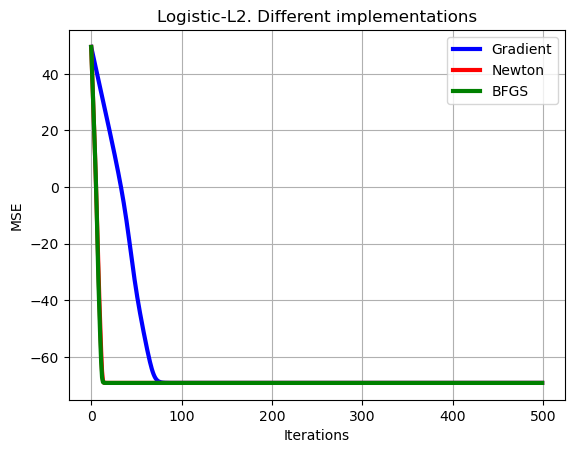

In [6]:
# Plot of learning curves
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_grad-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)+np.finfo(np.float32).eps),color='b', linewidth = 3)
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_hess-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)+np.finfo(np.float32).eps),color='r', linewidth = 3)
plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_BFGS-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)+np.finfo(np.float32).eps),color='g', linewidth = 3),
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend(['Gradient','Newton','BFGS'])
plt.title('Logistic-L2. Different implementations')
plt.show()

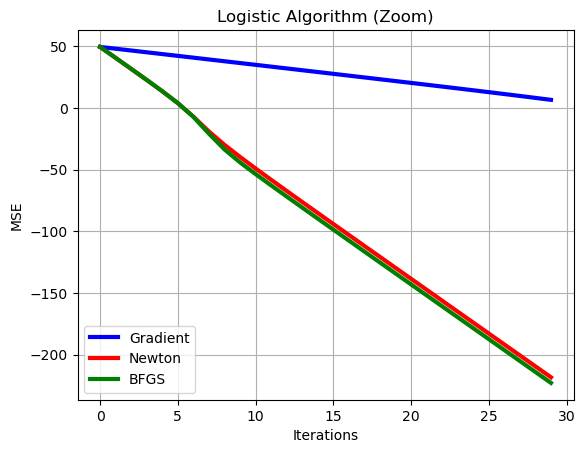

In [5]:
# Let's make a zoom
# Plot of learning curves
show=30
plt.plot(np.arange(0,show),10*np.log10(np.sum((loss_grad[0,:show]-loss_opt*np.ones((1,show)))**2,axis=0)),color='b', linewidth = 3)
plt.plot(np.arange(0,show),10*np.log10(np.sum((loss_hess[0,:show]-loss_opt*np.ones((1,show)))**2,axis=0)),color='r', linewidth = 3)
plt.plot(np.arange(0,show),10*np.log10(np.sum((loss_BFGS[0,:show]-loss_opt*np.ones((1,show)))**2,axis=0)),color='g', linewidth = 3),
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.legend(['Gradient','Newton','BFGS'])
plt.title('Logistic Algorithm (Zoom)')
plt.show()